In [1]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\2255243340.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'pymnt_plan', 
                   'next_pymnt_d', 'initial_list_status', 'policy_code', 'mths_since_last_record', 
                   'mths_since_last_delinq', 'mths_since_last_major_derog', 'last_fico_range_low', 
                   'last_fico_range_high', 'hardship_flag', 'hardship_type', 'hardship_reason', 
                   'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                   'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
                   'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
                   'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
                   'settlement_amount', 'settlement_percentage', 'settlement_term']
df_cleaned = df.drop(columns=columns_to_drop)

In [5]:
drop_null_column = ['funded_amnt_inv', 'total_bal_il', 'emp_title', 'issue_d', 'addr_state', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'sec_app_mths_since_last_major_derog',  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']
cleaned = df_cleaned.drop(columns=drop_null_column)

In [6]:
low_missing_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 
    'fico_range_low', 'fico_range_high', 'revol_bal', 'out_prncp', 'total_pymnt', 
    'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'application_type', 'delinq_2yrs', 'open_acc', 'inq_last_6mths', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens'
]
df_cleaned = cleaned.dropna(subset=low_missing_columns)

In [7]:
df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
df_cleaned['pub_rec_bankruptcies'] = df_cleaned['pub_rec_bankruptcies'].fillna(df_cleaned['pub_rec_bankruptcies'].median())
df_cleaned['tot_coll_amt'] = df_cleaned['tot_coll_amt'].fillna(df_cleaned['tot_coll_amt'].median())
df_cleaned['tot_cur_bal'] = df_cleaned['tot_cur_bal'].fillna(df_cleaned['tot_cur_bal'].median())
df_cleaned['total_rev_hi_lim'] = df_cleaned['total_rev_hi_lim'].fillna(df_cleaned['total_rev_hi_lim'].median())
df_cleaned['num_tl_op_past_12m'] = df_cleaned['num_tl_op_past_12m'].fillna(df_cleaned['num_tl_op_past_12m'].median())
df_cleaned['pct_tl_nvr_dlq'] = df_cleaned['pct_tl_nvr_dlq'].fillna(df_cleaned['pct_tl_nvr_dlq'].median())
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode())
df_cleaned['purpose'] = df_cleaned['purpose'].fillna(df_cleaned['purpose'].mode())

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\3127002921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\3127002921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\3127002921.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [8]:
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\4248550444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\4248550444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'].fillna(df_clea

In [9]:
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median(), inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\1118833201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\1118833201.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origina

In [10]:
home_ownership_mapping = {
    'MORTGAGE':0,
    'RENT':1,
    'OWN':2
}
df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\2972006397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)


In [11]:
verification_status_mapping = {
    'Not Verified':0,
    'Source Verified':1,
    'Verified':2
}
df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\49829525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)


In [12]:
df_cleaned['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [13]:
lst = list(df_cleaned['loan_status'])
lst.count('Default')

40

In [14]:
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Charged Off': 1,
    'In Grace Period': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\867387072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)


In [15]:
application_type_mapping = {
    'Individual':0,
    'Joint App':1
}
df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\2094341301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)


In [16]:
df_cleaned['term'] = df_cleaned['term'].str.strip()
term_mapping = {
    '60 months':0,
    '36 months':1
}
df_cleaned['term'] = df_cleaned['term'].map(term_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\1804118674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].str.strip()
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\1804118674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].map(term_mapping)


In [17]:
purpose_mapping = {
    'debt_consolidation': 0,
    'small_business': 1,
    'home_improvement': 2,
    'major_purchase': 3,
    'credit_card': 4,
    'other': 5,
    'house': 6,
    'vacation': 7,
    'car': 8,
    'medical': 9,
    'moving': 10,
    'renewable_energy': 11,
    'wedding': 12,
    'educational': 13
}
df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\313361140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)


In [18]:
# A>B>C>D>E>F
grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\1855757074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)


In [19]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                   'B1', 'B2', 'B3', 'B4', 'B5', 
                   'C1', 'C2', 'C3', 'C4', 'C5', 
                   'D1', 'D2', 'D3', 'D4', 'D5', 
                   'E1', 'E2', 'E3', 'E4', 'E5', 
                   'F1', 'F2', 'F3', 'F4', 'F5', 
                   'G1', 'G2', 'G3', 'G4', 'G5']
sub_grade_mapping = {sub_grade: i for i, sub_grade in enumerate(sub_grade_order)}
df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\4121050966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)


In [20]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
df_cleaned['credit_history_length'] = datetime.now().year - df_cleaned['earliest_cr_line'].dt.year


C:\Users\goura\AppData\Local\Temp\ipykernel_3296\591800192.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\591800192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_3296\591800192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [21]:
if 'earliest_cr_line' in df_cleaned.columns:
    # Convert 'earliest_cr_line' to the number of years since the earliest credit line
    df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365
    # Now drop the original 'earliest_cr_line' column since we have derived a numeric feature from it
    df_cleaned = df_cleaned.drop(columns=['earliest_cr_line'])

C:\Users\goura\AppData\Local\Temp\ipykernel_3296\2400239070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365


In [22]:
# plt.figure(figsize=(12, 4))
# sns.countplot(x="loan_status",data=df_cleaned)

In [23]:
# plt.figure(figsize=(9,4))
# sns.distplot(df_cleaned["loan_amnt"],kde=False,bins=40)

In [24]:
# plt.figure(figsize=(30,20))
# sns.heatmap(df_cleaned.corr(),annot=True,cmap="viridis")

In [25]:
# sns.scatterplot(x="installment",y="loan_amnt",data=df_cleaned)

In [26]:
# sns.boxplot(x="loan_status",y="loan_amnt",data=df_cleaned)

In [27]:
# df_cleaned.groupby("loan_status")["loan_amnt"].describe()

In [28]:
# sns.countplot(x="grade",hue="loan_status",data=df_cleaned)

In [29]:
# plt.figure(figsize=(12,4))
# sub_order=sorted(df_cleaned["sub_grade"].unique())
# sns.countplot(x='sub_grade',data=df_cleaned,order=sub_order)

In [30]:
# df_cleaned.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

In [31]:
# plt.figure(figsize=(12,4))
# sns.countplot(x="verification_status",data=df_cleaned,hue="loan_status")

In [32]:
data=df_cleaned.sample(frac=.5,random_state=101)

In [33]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Separate the feature set (X) and the target/label (y)
X = df_cleaned.drop(columns=['loan_status'])  # Drop 'loan_status' from the feature set
y = df_cleaned['loan_status']  # 'loan_status' as the target

# Perform train-test split (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1808417, 39)
X_test shape: (452105, 39)
y_train shape: (1808417,)
y_test shape: (452105,)


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

# Fit the scaler only on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
import numpy as np
from sklearn.utils import class_weight

# Calculate class weights based on the unique classes in y_train
classes_in_y = np.unique(y_train)  # Should now contain both 0 and 1
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes_in_y, y=y_train)

# Convert to dictionary for TensorFlow
class_weight_dict = {int(classes_in_y[i]): class_weights[i] for i in range(len(classes_in_y))}
print("Class weights:", class_weight_dict)


Class weights: {0: 0.5776154709035809, 1: 3.721007320957527}


In [38]:
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1]


In [39]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [40]:
classes_in_y = np.unique(y_train)  # Should contain [0, 1]
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes_in_y,
    y=y_train
)

# Create the class_weight dictionary with the exact classes from y_train
class_weight_dict = {int(classes_in_y[i]): class_weights[i] for i in range(len(classes_in_y))}
print("Class weights:", class_weight_dict)

Class weights: {0: 0.5776154709035809, 1: 3.721007320957527}


In [41]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights to balance the classes
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train the model with class weights
# Train the model with class weights
# Run model training without class weights
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=2
)




Epoch 1/50
56514/56514 - 130s - 2ms/step - loss: 0.3959 - val_loss: 0.3940
Epoch 2/50
56514/56514 - 116s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 3/50
56514/56514 - 111s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 4/50
56514/56514 - 113s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 5/50
56514/56514 - 108s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 6/50
56514/56514 - 117s - 2ms/step - loss: 0.3946 - val_loss: 0.3940
Epoch 7/50
56514/56514 - 112s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 8/50
56514/56514 - 112s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 9/50
56514/56514 - 114s - 2ms/step - loss: 0.3946 - val_loss: 0.3940
Epoch 10/50
56514/56514 - 124s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 11/50
56514/56514 - 113s - 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 12/50
56514/56514 - 106s - 2ms/step - loss: 0.3946 - val_loss: 0.3940
Epoch 13/50
56514/56514 - 146s - 3ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 14/50
56514/565

In [42]:
# model.fit(x=X_train,y=y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stop])

In [43]:
# loss=pd.DataFrame(model.history.history)

# loss.plot()

14129/14129 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step


C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93    391522
           1       0.00      0.00      0.00     60583

    accuracy                           0.87    452105
   macro avg       0.43      0.50      0.46    452105
weighted avg       0.75      0.87      0.80    452105

Confusion Matrix:
 [[391522      0]
 [ 60583      0]]
AUC: 0.5


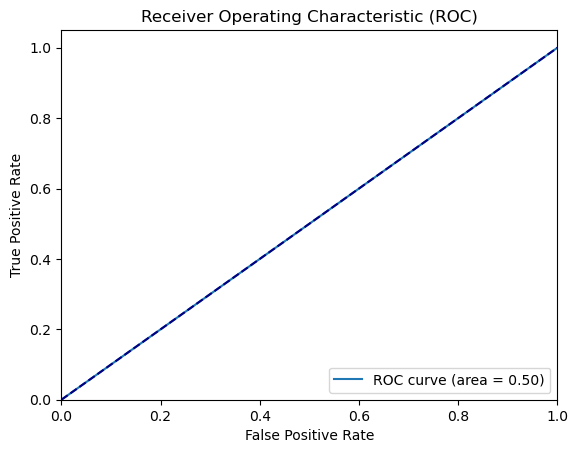

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# Assuming this is a binary classifier and predict() gives probabilities
predict_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1) using threshold of 0.5
predict = (predict_prob >= 0.5).astype(int)

# Now pass the binary predictions to the classification metrics
print(classification_report(y_test, predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [45]:
# # Ensure the true labels are binary (0 and 1)
# print("Unique values in y_test:", np.unique(y_test))

# # If needed, convert labels to binary (0 or 1)
# # For example, if your labels are [0, 2] or [1, 2], you can map them:
# y_test = y_test.replace({2: 1})  # If 2 is used to indicate class 1


In [46]:
# Assuming model.predict() returns probabilities for binary classification
predict_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
predict = (predict_prob >= 0.5).astype(int)

# Now you can use the classification metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print(classification_report(y_test, predict))
# print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
roc_auc = roc_auc_score(y_test, predict_prob)
print("AUC:", roc_auc)


In [47]:
# # Re-run train-test split with stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [48]:
# loan_status_mapping_binary = {
#     'Fully Paid': 0,
#     'Current': 0,
#     'Charged Off': 1,
#     'In Grace Period': 1,
#     'Late (31-120 days)': 1,
#     'Late (16-30 days)': 1,
#     'Default': 1,
#     'Does not meet the credit policy. Status:Fully Paid': 0,
#     'Does not meet the credit policy. Status:Charged Off': 1
# }

# # Apply mapping to create the binary column
# # df_cleaned['loan_status_binary'] = df_cleaned['loan_status'].map(loan_status_mapping_binary)

# # Verify that only 0 and 1 are present in the new column
# print(df_cleaned['loan_status'].unique())


In [49]:
# import numpy as np
# from sklearn.utils import class_weight

# # Calculate class weights, ensuring `classes` is a NumPy array
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.array([0, 1]),  # Convert [0, 1] to a NumPy array
#     y=y_train
# )

# # Convert to dictionary format for TensorFlow
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# print("Class weights:", class_weight_dict)
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,validation_data=(X_test_scaled, y_test), class_weight=class_weight_dict, verbose=2)

In [50]:
# from sklearn.utils import class_weight

# # Calculate class weights based on the training data
# # class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
# # class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# # Train the model with class weights
# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_test_scaled, y_test),
#     class_weight=class_weight_dict,  # Apply class weights
#     verbose=2
# )
